# ROI Analysis 

## Importing Data
The importData.py script provides the basic functionality for importing a single or multiple ROI result files (from a single or multiple directories) into a Python Pandas DataFrame. The DataFrame is a multidimensional data structure with functions to group, extract and summarize subset(s) of the data.

The importData.py script accepts several command line arguments, which are eplained when running the following command:

In [5]:
%run "analyzerapp.py" -h

usage: analyzerapp.py [-h] [-i INPUT [INPUT ...]] [-e EXCLUDE [EXCLUDE ...]]
                      [-o OUTPUT] [-p PARSER] [-c CONFIG]

optional arguments:
  -h, --help            show this help message and exit
  -i INPUT [INPUT ...], --input INPUT [INPUT ...]
                        import set of files or directories
  -e EXCLUDE [EXCLUDE ...], --exclude EXCLUDE [EXCLUDE ...]
                        exclude file from importing
  -o OUTPUT, --output OUTPUT
                        save imported dataset to file
  -p PARSER, --parser PARSER
                        use this class to parse filename
  -c CONFIG, --config CONFIG
                        configuration file, superseeds -p option


In [1]:
# update directory paths
%run "analyzerapp.py" -i ../data/machine_learning_test_fixed/Master-AA-LNCAP-mito_only.txt -e Master.txt -p core.parser.no_parser -o "../data/machine_learning_test_fixed/testMaster.txt"

Namespace(config=None, exclude=['Master.txt'], input=['../data/machine_learning_test_fixed/Master-AA-LNCAP-mito_only.txt'], output='../data/machine_learning_test_fixed/testMaster.txt', parser='core.parser.no_parser')

Found 1 file(s), skipping 0 file(s).
Configuration.UPDATE: keys= ['parser'] in None

Importing raw data from 1 file(s)...
['Category', 'Cell', 'Cell line', 'Compartment', 'FOV', 'Time', 'Treatment']
Reordered headers: ['Directory' 'File' 'Cell' 'Cell line' 'Compartment' 'FOV' 'Treatment'
 'FAD a1' 'FAD a1[%]' 'FAD a1[%]/a2[%]' 'FAD a2' 'FAD a2[%]' 'FAD chi'
 'FAD photons' 'FAD photons/NAD(P)H photons' 'FAD t1' 'FAD t2' 'FAD tm'
 'FLIRR (NAD(P)H a2[%]/FAD a1[%])' 'NAD(P)H a1' 'NAD(P)H a1[%]'
 'NAD(P)H a2' 'NAD(P)H a2[%]' 'NAD(P)H a2[%]/a1[%]' 'NAD(P)H chi'
 'NAD(P)H photons' 'NAD(P)H t1' 'NAD(P)H t2' 'NAD(P)H tm'
 'NAD(P)H tm/FAD tm' 'NADH %' 'NADPH %' 'NADPH a2/FAD a1' 'NADPH/NADH'
 'trp E%1' 'trp E%2' 'trp E%3' 'trp a1' 'trp a1[%]' 'trp a1[%]/a2[%]'
 'trp a2' 'trp a2[%]'

/Users/khs3z/Documents/ARCS/UserProjects/Wallrabe_ROI_analysis/src/core/preprocessor.py:16: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  dataframe = dataframe.reindex_axis(newheaders, axis=1)
analyzerapp.py:73: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  data = data.reindex_axis(nh, axis=1)


KeyError: 'NAD(P)H %'

## Simple overview of entire raw data
We can run data.describe() to see headers/labels of all data columns and get a simple summary statistic of all ROIs regardless of file, cell, or FOV origin. The row labeled 'count' indicates the number of all ROIs read from the input file(s).

Note that the describe() function omits any columns that does not contain numerical data, in this case the 'File', 'Directory', 'FOV', 'Cell', and 'Treatment' columns.

In [247]:
data.describe()

,,Exc1_-Ch1-_a1,Exc1_-Ch1-_a1[%],Exc1_-Ch1-_a2,Exc1_-Ch1-_a2[%],Exc1_-Ch1-_chi,Exc1_-Ch1-_offset,Exc1_-Ch1-_photons,Exc1_-Ch1-_scatter,Exc1_-Ch1-_shift,...,Exc2_-Ch3-_a1[%],Exc2_-Ch3-_a2,Exc2_-Ch3-_a2[%],Exc2_-Ch3-_chi,Exc2_-Ch3-_offset,Exc2_-Ch3-_photons,Exc2_-Ch3-_scatter,Exc2_-Ch3-_shift,Exc2_-Ch3-_t1,Exc2_-Ch3-_t2
count,8212.000000,8212.000000,8212.000000,8212.000000,8212.000000,8212.000000,8212.0,8212.000000,8212.0,8.212000e+03,...,8212.000000,8212.000000,8212.000000,8212.000000,8212.0,8212.000000,8212.0,8212.0,8212.000000,8212.000000
mean,360.401364,0.000967,62.763469,0.000630,37.236531,1.105183,0.0,29.978446,0.0,2.400000e+00,...,71.970777,0.001081,28.029223,1.152115,0.0,161.619338,0.0,-6.0,515.657086,3420.174453
std,273.556881,0.000371,11.664125,0.000417,11.664125,0.124726,0.0,12.088161,0.0,3.997046e-15,...,5.713240,0.000420,5.713240,0.140804,0.0,63.829493,0.0,0.0,147.221980,399.480156
min,1.000000,0.000100,31.861200,0.000039,7.394480,0.733687,0.0,0.000000,0.0,2.400000e+00,...,53.631001,0.000190,10.036000,0.687292,0.0,28.000000,0.0,-6.0,121.580002,2315.409912
25%,137.000000,0.000687,52.827951,0.000319,25.848550,1.019840,0.0,21.000000,0.0,2.400000e+00,...,67.882301,0.000740,24.053350,1.053690,0.0,111.000000,0.0,-6.0,425.107758,3133.374939
50%,294.000000,0.000923,62.801849,0.000478,37.198151,1.098460,0.0,29.000000,0.0,2.400000e+00,...,71.301048,0.001074,28.698951,1.141950,0.0,160.000000,0.0,-6.0,508.849991,3393.880005
75%,533.000000,0.001223,74.151451,0.000841,47.172049,1.183772,0.0,39.000000,0.0,2.400000e+00,...,75.946648,0.001386,32.117700,1.239343,0.0,208.000000,0.0,-6.0,593.651993,3666.590027
max,1099.000000,0.002148,92.605499,0.002113,68.138802,1.586700,0.0,79.000000,0.0,2.400000e+00,...,89.963997,0.002589,46.368999,1.933670,0.0,468.000000,0.0,-6.0,1359.920044,5380.229980


To show the list of column headers in the imported DataFrame, we can use the data.columns.values attribute. Note that the imported DataFrame contains 'Directory', 'File', 'FOV', 'Cell', 'Treatment' as additional columns. These new columns allow the filtering and combination of ROI subsets.

In [248]:
print list(data.columns.values)

[' ', 'Exc1_-Ch1-_a1', 'Exc1_-Ch1-_a1[%]', 'Exc1_-Ch1-_a2', 'Exc1_-Ch1-_a2[%]', 'Exc1_-Ch1-_chi', 'Exc1_-Ch1-_offset', 'Exc1_-Ch1-_photons', 'Exc1_-Ch1-_scatter', 'Exc1_-Ch1-_shift', 'Exc1_-Ch1-_t1', 'Exc1_-Ch1-_t2', 'Exc1_-Ch2-_a1', 'Exc1_-Ch2-_a1[%]', 'Exc1_-Ch2-_a2', 'Exc1_-Ch2-_a2[%]', 'Exc1_-Ch2-_chi', 'Exc1_-Ch2-_offset', 'Exc1_-Ch2-_photons', 'Exc1_-Ch2-_scatter', 'Exc1_-Ch2-_shift', 'Exc1_-Ch2-_t1', 'Exc1_-Ch2-_t2', 'Exc1_-Ch3-_a1', 'Exc1_-Ch3-_a1[%]', 'Exc1_-Ch3-_a2', 'Exc1_-Ch3-_a2[%]', 'Exc1_-Ch3-_chi', 'Exc1_-Ch3-_offset', 'Exc1_-Ch3-_photons', 'Exc1_-Ch3-_scatter', 'Exc1_-Ch3-_shift', 'Exc1_-Ch3-_t1', 'Exc1_-Ch3-_t2', 'Exc2_-Ch1-_a1', 'Exc2_-Ch1-_a1[%]', 'Exc2_-Ch1-_a2', 'Exc2_-Ch1-_a2[%]', 'Exc2_-Ch1-_chi', 'Exc2_-Ch1-_offset', 'Exc2_-Ch1-_photons', 'Exc2_-Ch1-_scatter', 'Exc2_-Ch1-_shift', 'Exc2_-Ch1-_t1', 'Exc2_-Ch1-_t2', 'Exc2_-Ch2-_a1', 'Exc2_-Ch2-_a1[%]', 'Exc2_-Ch2-_a2', 'Exc2_-Ch2-_a2[%]', 'Exc2_-Ch2-_chi', 'Exc2_-Ch2-_offset', 'Exc2_-Ch2-_photons', 'Exc2_-Ch2-_sca

## Grouping data

Group data by 'File', 'FOV','Cell','Treatment' and calculate mean value for all columns for each group. Each row represents a group, defined by the unique combination of your chosen groupby column values ('File','FOV','Cell','Treatment').

In [249]:
data.groupby(['File','FOV','Cell','Treatment']).mean()

,,,,,Exc1_-Ch1-_a1,Exc1_-Ch1-_a1[%],Exc1_-Ch1-_a2,Exc1_-Ch1-_a2[%],Exc1_-Ch1-_chi,Exc1_-Ch1-_offset,Exc1_-Ch1-_photons,Exc1_-Ch1-_scatter,Exc1_-Ch1-_shift,...,Exc2_-Ch3-_a1[%],Exc2_-Ch3-_a2,Exc2_-Ch3-_a2[%],Exc2_-Ch3-_chi,Exc2_-Ch3-_offset,Exc2_-Ch3-_photons,Exc2_-Ch3-_scatter,Exc2_-Ch3-_shift,Exc2_-Ch3-_t1,Exc2_-Ch3-_t2
File,FOV,Cell,Treatment,,,,,,,,,,,,,,,,,,,,,
Results-1a-HeLactrl_000001.txt,a,000001,1,164.0,0.001248,53.452296,0.001148,46.547704,1.154654,0.0,41.204893,0.0,2.4,...,79.146027,0.000750,20.853973,1.359283,0.0,123.681957,0.0,-6.0,520.028917,3253.784183
Results-1b-HeLactrl_000001.txt,b,000001,1,204.5,0.001354,56.785670,0.001045,43.214330,1.122797,0.0,42.169118,0.0,2.4,...,75.355892,0.000985,24.644108,1.118568,0.0,147.526961,0.0,-6.0,512.551661,3114.746844
Results-1c-HeLactrl_000008.txt,c,000008,1,550.0,0.001176,55.752961,0.001031,44.247039,1.098316,0.0,36.883530,0.0,2.4,...,79.430857,0.000737,20.569143,1.127865,0.0,103.088262,0.0,-6.0,346.310942,3045.169838
Results-2a-HeLaDoxo_000001.txt,a,000001,2,110.5,0.001376,54.574993,0.001184,45.425007,1.246812,0.0,47.127273,0.0,2.4,...,74.320843,0.001416,25.679157,1.204537,0.0,201.036364,0.0,-6.0,445.858095,3317.052992
Results-2b-HeLaDoxo_000001.txt,b,000001,2,265.5,0.001172,67.866534,0.000561,32.133466,1.140054,0.0,34.664151,0.0,2.4,...,70.426002,0.001186,29.573998,1.129372,0.0,168.966038,0.0,-6.0,545.564811,3274.606168
Results-2c-HeLaDoxo_000008.txt,c,000008,2,520.0,0.001157,61.266316,0.000760,38.733684,1.170005,0.0,38.157844,0.0,2.4,...,73.127833,0.001088,26.872167,1.157199,0.0,158.314726,0.0,-6.0,460.147384,3399.771122
Results-3a-HeLaDoxo_000001.txt,a,000001,3,86.5,0.001138,57.460433,0.000868,42.539567,1.153445,0.0,35.331395,0.0,2.4,...,72.192336,0.001023,27.807664,1.142054,0.0,163.034884,0.0,-6.0,555.467854,3533.475394
Results-3b-HeLaDoxo_000001.txt,b,000001,3,298.5,0.000874,69.883177,0.000376,30.116823,1.035435,0.0,25.649329,0.0,2.4,...,68.097954,0.001217,31.902046,1.167247,0.0,171.963087,0.0,-6.0,607.712893,3382.725668
Results-3c-HeLaDoxo_000008.txt,c,000008,3,508.5,0.000908,66.380513,0.000472,33.619487,1.093843,0.0,27.627953,0.0,2.4,...,70.545679,0.000997,29.454321,1.133008,0.0,149.669291,0.0,-6.0,512.784888,3498.891863


Let's do the same again but calculate the mean for a specific column only ('Exc1_-Ch1-_photons'):

In [250]:
data.groupby(['File','FOV','Cell','Treatment'])['Exc1_-Ch1-_photons'].mean()

File                            FOV  Cell    Treatment
Results-1a-HeLactrl_000001.txt  a    000001  1            41.204893
Results-1b-HeLactrl_000001.txt  b    000001  1            42.169118
Results-1c-HeLactrl_000008.txt  c    000008  1            36.883530
Results-2a-HeLaDoxo_000001.txt  a    000001  2            47.127273
Results-2b-HeLaDoxo_000001.txt  b    000001  2            34.664151
Results-2c-HeLaDoxo_000008.txt  c    000008  2            38.157844
Results-3a-HeLaDoxo_000001.txt  a    000001  3            35.331395
Results-3b-HeLaDoxo_000001.txt  b    000001  3            25.649329
Results-3c-HeLaDoxo_000008.txt  c    000008  3            27.627953
Results-4a-HeLaDoxo_000001.txt  a    000001  4            26.454545
Results-4b-HeLaDoxo_000001.txt  b    000001  4            21.378099
Results-4c-HeLaDoxo_000008.txt  c    000008  4            21.100000
Results-5a-HeLaDoxo_000001.txt  a    000001  5            21.655870
Results-5b-HeLaDoxo_000001.txt  b    000001  5            18.

## Filtering, combining and grouping data

Let's filter all ROIs from cells '000001' in FOV 'a' and 'b':

In [251]:
# Filter and combine data of interest in new DataFrame
fovab_cell000001_allrois = data[(data['FOV'].isin(['a','b'])) & (data['Cell']=='000001')]
# get summary stats
print fovab_cell000001_allrois['Exc1_-Ch1-_photons'].describe()

count    3560.000000
mean       30.603090
std        11.123312
min         6.000000
25%        22.000000
50%        29.000000
75%        39.000000
max        69.000000
Name: Exc1_-Ch1-_photons, dtype: float64


Let's filter and combine the data for cells '000001' in  FOV 'a' and 'b', and calculate the mean for 'Exc1_-Ch1-_photons' for each Treatment. Since we only group by 'Treatment' (but not by 'Cell' or 'FOV' as before), the ROI data that match the specified 'FOV' and 'Cell' values will be combined for each Treatment.

In [3]:
# Filter and combine data of interest in new DataFrame
fovab_cell000001 = data[(data['FOV'].isin(['a','b'])) & (data['Cell']=='000001')]
# group data and calculate mean on specific data column
grouping = ['Treatment']
column = 'Exc1_-Ch1-_photons'

grouped_photons = fovab_cell000001.groupby(grouping)[column]
mean = grouped_photons.mean().rename(column+' mean')
std = grouped_photons.std().rename(column+' std')
median = grouped_photons.median().rename(column+' median')
min = grouped_photons.min().rename(column+' min')
max = grouped_photons.max().rename(column+' max')

pd.concat([mean, std, median, min, max],axis=1)


,Exc1_-Ch1-_photons mean,Exc1_-Ch1-_photons std,Exc1_-Ch1-_photons median,Exc1_-Ch1-_photons min,Exc1_-Ch1-_photons max
Treatment,,,,,
1,41.740136,7.705351,42,19,68
2,38.320000,9.263622,37,13,69
3,27.817708,7.114310,27,8,52
4,23.070248,5.823308,23,9,40
5,19.647160,5.312099,20,6,36


In [27]:
# Filter and combine data of interest in new DataFrame
fovab_cell000001 = data[(data['FOV'].isin(['a','b'])) & (data['Cell']=='000001')]
# group data and calculate mean on specific data column
grouping = ['Treatment']
column = 'Exc1_-Ch1-_photons'

# Compare different ways to calculate mean for treatments
mean_all_Rois = fovab_cell000001.groupby(grouping)[column].mean()
mean_per_cell = fovab_cell000001.groupby(['Treatment','FOV','Cell',])[column].mean()
mean_of_mean_per_cell = mean_per_cell.groupby(grouping).mean()
print "\nMean all Rois\n", mean_all_Rois
print "\nMean per cell\n", mean_per_cell
print "\nMean of mean per cell\n", mean_of_mean_per_cell


Mean all Rois
Treatment
1    41.740136
2    38.320000
3    27.817708
4    23.070248
5    19.647160
Name: Exc1_-Ch1-_photons, dtype: float64

Mean per cell
Treatment  FOV  Cell  
1          a    000001    41.204893
           b    000001    42.169118
2          a    000001    47.127273
           b    000001    34.664151
3          a    000001    35.331395
           b    000001    25.649329
4          a    000001    26.454545
           b    000001    21.378099
5          a    000001    21.655870
           b    000001    18.161677
Name: Exc1_-Ch1-_photons, dtype: float64

Mean of mean per cell
Treatment
1    41.687005
2    40.895712
3    30.490362
4    23.916322
5    19.908774
Name: Exc1_-Ch1-_photons, dtype: float64


In [10]:
data.groupby(['File'])['Exc1_-Ch1-_photons'].mean()

File
Results-1a-HeLactrl_000001.txt    41.204893
Results-1b-HeLactrl_000001.txt    42.169118
Results-1c-HeLactrl_000008.txt    36.883530
Results-2a-HeLaDoxo_000001.txt    47.127273
Results-2b-HeLaDoxo_000001.txt    34.664151
Results-2c-HeLaDoxo_000008.txt    38.157844
Results-3a-HeLaDoxo_000001.txt    35.331395
Results-3b-HeLaDoxo_000001.txt    25.649329
Results-3c-HeLaDoxo_000008.txt    27.627953
Results-4a-HeLaDoxo_000001.txt    26.454545
Results-4b-HeLaDoxo_000001.txt    21.378099
Results-4c-HeLaDoxo_000008.txt    21.100000
Results-5a-HeLaDoxo_000001.txt    21.655870
Results-5b-HeLaDoxo_000001.txt    18.161677
Results-5c-HeLaDoxo_000008.txt    17.113982
Name: Exc1_-Ch1-_photons, dtype: float64

In [24]:
# get the means for all data columns for all ROIs in a specific file
data[data['File']==('Results-1a-HeLactrl_000001.txt')].mean()

                      1.640000e+02
Exc1_-Ch1-_a1         1.248098e-03
Exc1_-Ch1-_a1[%]      5.345230e+01
Exc1_-Ch1-_a2         1.148253e-03
Exc1_-Ch1-_a2[%]      4.654770e+01
Exc1_-Ch1-_chi        1.154654e+00
Exc1_-Ch1-_offset     0.000000e+00
Exc1_-Ch1-_photons    4.120489e+01
Exc1_-Ch1-_scatter    0.000000e+00
Exc1_-Ch1-_shift      2.400000e+00
Exc1_-Ch1-_t1         8.427323e+02
Exc1_-Ch1-_t2         4.192185e+03
Exc1_-Ch2-_a1         6.551540e-03
Exc1_-Ch2-_a1[%]      8.275073e+01
Exc1_-Ch2-_a2         1.371221e-03
Exc1_-Ch2-_a2[%]      1.724927e+01
Exc1_-Ch2-_chi        1.235543e+00
Exc1_-Ch2-_offset     0.000000e+00
Exc1_-Ch2-_photons    7.864404e+02
Exc1_-Ch2-_scatter    0.000000e+00
Exc1_-Ch2-_shift      4.000000e-01
Exc1_-Ch2-_t1         4.375026e+02
Exc1_-Ch2-_t2         3.259614e+03
Exc1_-Ch3-_a1         1.151562e-04
Exc1_-Ch3-_a1[%]      2.685052e+01
Exc1_-Ch3-_a2         1.600445e-04
Exc1_-Ch3-_a2[%]      7.314948e+01
Exc1_-Ch3-_chi        4.009546e+01
Exc1_-Ch3-_offset   

In [255]:
data.groupby('Treatment').mean()

,,Exc1_-Ch1-_a1,Exc1_-Ch1-_a1[%],Exc1_-Ch1-_a2,Exc1_-Ch1-_a2[%],Exc1_-Ch1-_chi,Exc1_-Ch1-_offset,Exc1_-Ch1-_photons,Exc1_-Ch1-_scatter,Exc1_-Ch1-_shift,...,Exc2_-Ch3-_a1[%],Exc2_-Ch3-_a2,Exc2_-Ch3-_a2[%],Exc2_-Ch3-_chi,Exc2_-Ch3-_offset,Exc2_-Ch3-_photons,Exc2_-Ch3-_scatter,Exc2_-Ch3-_shift,Exc2_-Ch3-_t1,Exc2_-Ch3-_t2
Treatment,,,,,,,,,,,,,,,,,,,,,
1,404.315158,0.001229,55.572496,0.001055,44.427504,1.113807,0.0,38.829880,0.0,2.4,...,78.473537,0.000795,21.526463,1.167058,0.0,116.646129,0.0,-6.0,414.267317,3097.843943
2,394.245388,0.001188,62.398806,0.000753,37.601194,1.170577,0.0,38.225824,0.0,2.4,...,72.474111,0.001157,27.525889,1.154776,0.0,166.723868,0.0,-6.0,483.695508,3352.518236
3,397.656951,0.000919,66.690678,0.000478,33.309322,1.080077,0.0,27.709641,0.0,2.4,...,69.886700,0.001073,30.113300,1.145319,0.0,158.405830,0.0,-6.0,548.613678,3463.417264
4,319.280332,0.000735,65.807758,0.000388,34.192242,1.080570,0.0,22.013410,0.0,2.4,...,69.039456,0.001148,30.960543,1.126138,0.0,174.453384,0.0,-6.0,556.319021,3590.601391
5,244.861985,0.000624,64.431857,0.000348,35.568143,1.065250,0.0,18.301856,0.0,2.4,...,68.324219,0.001320,31.675781,1.168774,0.0,209.225182,0.0,-6.0,613.039611,3717.315183


## Saving a DataFrame

In [36]:
df = data.groupby('Treatment').apply()
df.to_pickle(os.path.join('..','TestData-Results-Ruofan','Pickled_table'))
df.to_csv(os.path.join('..','TestData-Results-Ruofan','table.csv'))

TypeError: apply() takes at least 2 arguments (1 given)

## Creating Data Plots

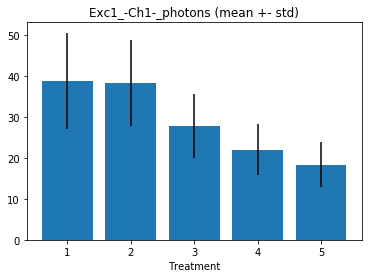

In [256]:
# create histogram of means +- std for custom column grouped by treatment
import matplotlib.pyplot as plt

column = 'Exc1_-Ch1-_photons'
datasubset = data.groupby('Treatment')[column]
mean = datasubset.mean()
std = datasubset.std()

plt.bar(range(len(mean)),mean, tick_label=mean.index, yerr=std)
plt.title(column + " (mean +- std)")
plt.xlabel('Treatment')
plt.show()

['r', 'r', 'r', 'r', 'r', 'g', 'g', 'g', 'g', 'g', 'b', 'b', 'b', 'b', 'b']
MultiIndex(levels=[[u'a', u'b', u'c'], [u'000001', u'000008'], [u'1', u'2', u'3', u'4', u'5']],
           labels=[[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1], [0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4]],
           names=[u'FOV', u'Cell', u'Treatment'])


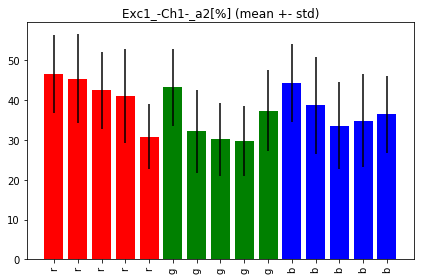

In [257]:
# create histogram of means +- std for custom column grouped by FOV, cell and treatment
import matplotlib.pyplot as plt

column = 'Exc1_-Ch1-_a2[%]'
grouping = ['FOV','Cell','Treatment'] 
datasubset = data.groupby(grouping)[column]
#datasubset = data[data['Treatment'].isin(['1','5'])].groupby(grouping)[column]

mean = datasubset.mean()
std = datasubset.std()

# optional: color bars by cell
nocolors = len(data.groupby(grouping[:-1]))
values_per_color = len(datasubset) // nocolors
colorchoices = 'rgbcmy'
colors = [[colorchoices[i % len(colorchoices)]] * values_per_color for i in range(nocolors)]
colors = [c for groupcolor in colors for c in groupcolor]
print colors
print mean.index

# create bar plot
plt.bar(range(len(mean)),mean, tick_label=colors, yerr=std, color=colors)
plt.title(column + " (mean +- std)")
plt.xticks(rotation=90)
plt.tight_layout()

# save plot
filename = column + "-" + str(grouping) + ".png"
for c in ", []\'":
    filename = filename.replace(c,"")
plt.savefig(os.path.join('..','TestData-Results-Ruofan',filename), dpi=300)

# show plot
plt.show()

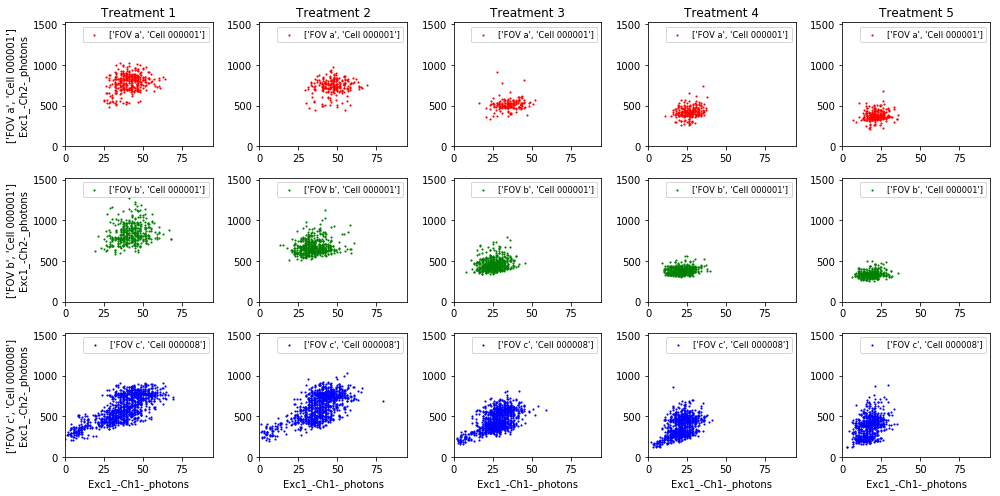

In [258]:
# Create scatter plots using custom groups
import matplotlib.pyplot as plt

x = 'Exc1_-Ch1-_photons'
y = 'Exc1_-Ch2-_photons'
grouping = ['FOV','Cell','Treatment']
datasubset = data.groupby(grouping)
cols = len(data.groupby(grouping[-1]))
rows = len(datasubset)//cols

maxx = data[x].max() * 1.2
maxy = data[y].max() * 1.2
fig,ax = plt.subplots(rows ,cols, figsize=(14, 7))
i=0
color = ['r','g','b','c','m','y']
for name,group in datasubset:
    label = [t[0]+" "+t[1] for t in zip(grouping[:-1],name[:-1])] 
    ax[i//cols][i%cols].scatter(group[x],group[y],marker=".",s=5,label=str(label), color=color[(i//cols)%cols])
    ax[i//cols][i%cols].legend(loc="upper right",fontsize="small")
    if (i//cols==0):
        ax[i//cols][i%cols].set_title(" ".join([grouping[-1],name[-1]]))
    if (i%cols==0):
        ax[i//cols][i%cols].set_ylabel(str(label)+"\n"+y)
    if (i//cols==rows-1):
        ax[i//cols][i%cols].set_xlabel(x)

    ax[i//cols][i%cols].set_xlim([0,maxx])
    ax[i//cols][i%cols].set_ylim([0,maxy])
    i+=1
plt.tight_layout()    
plt.show() 

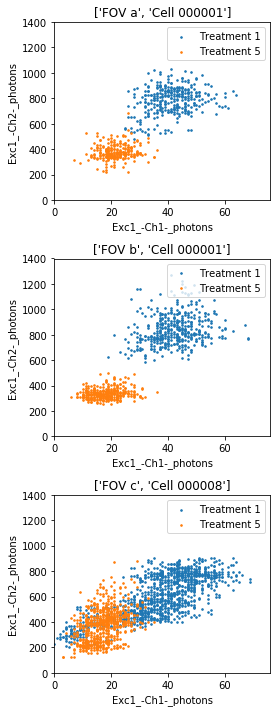

In [259]:
# Create scatter plots overlaying Treatment 1 and Treatment 2 using custom groups

import matplotlib.pyplot as plt
x = 'Exc1_-Ch1-_photons'
y = 'Exc1_-Ch2-_photons'
datasubset = data[data['Treatment'].isin(['1','5'])]

grouping = ['FOV','Cell','Treatment']
groupedsubset = datasubset.groupby(grouping)
cols = len(datasubset.groupby(grouping[-1]))
rows = len(groupedsubset)//cols

maxx = datasubset[x].max() * 1.1
maxy = datasubset[y].max() * 1.1

fig,ax = plt.subplots(rows,figsize=(4,10))
i=0
for name,group in groupedsubset:
    label = [t[0]+" "+t[1] for t in zip(grouping[:-1],name[:-1])] 
    ax[i//cols].scatter(group[x],group[y],s=10,marker=".",label=" ".join(["Treatment",name[-1]]))
    ax[i//cols].legend(loc="upper right")    
    ax[i//cols].set_xlim([0,maxx])
    ax[i//cols].set_ylim([0,maxy])    
    ax[i//cols].set_xlabel(x)
    ax[i//cols].set_ylabel(y)    
    ax[i//cols].set_title(label)    
    i+=1
plt.tight_layout()    
plt.show()